<a href="https://colab.research.google.com/github/rositadiantyy/MachineLearningCourse/blob/main/Final%20Exam/Twitter%20Sentiment%20Analysis/part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LSTM**

In [20]:
# Importing libraries
import re, nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Importing the dataset
df = pd.read_csv("train.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
# Checking for null values
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [5]:
# Defining dependent and independent vectors
# Taking only title for prediction
x = df.iloc[:,2:3]
y = df['label']

In [6]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

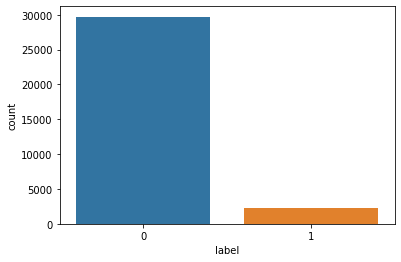

In [7]:
# Checking number of real and fake news
sns.countplot(x = 'label',data = df)

In [12]:
# Text Cleaning and preprocessing

cleaned = []
for i in range(0,len(df)):
    
    #removing words any other than (a-z) and (A-Z)
    text = re.sub('[^a-zA-Z]',' ', x['tweet'][i])
    
    #converting all words into lower case
    text = text.lower()
    
    #tokenizing 
    text = text.split()
    
    #stemming and removing stopwords
    ps = PorterStemmer()
    text = [ps.stem(words) for words in text if words not in stopwords.words('english')]
    text = ' '.join(text)
    cleaned.append(text)

In [13]:
# Cleaned text
cleaned[:5]

['user father dysfunct selfish drag kid dysfunct run',
 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank',
 'bihday majesti',
 'model love u take u time ur',
 'factsguid societi motiv']

In [14]:
# Taking dictionary size 5000
vocab_size = 5000

# One hot encoding
one_hot_dir = [one_hot(words,vocab_size) for words in cleaned]

# Length of all rows should be equal therefore applying padding
# This will adjust size by adding 0 at staring of the shorter rows
embedded_layer = pad_sequences(one_hot_dir,padding = 'pre')
embedded_layer

array([[   0,    0,    0, ..., 4395,  390, 2969],
       [   0,    0,    0, ..., 2846, 3188, 3913],
       [   0,    0,    0, ...,    0, 1371,  746],
       ...,
       [   0,    0,    0, ..., 4728, 4455, 1924],
       [   0,    0,    0, ..., 1670, 4429, 3286],
       [   0,    0,    0, ...,  669, 4771, 3410]], dtype=int32)

In [15]:
# Converting into numpy arrays.
x = np.array(embedded_layer)
y = np.array(y)

In [16]:
# Splitting the Dataset into Train and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
from tensorflow.keras import regularizers
#creating model using LSTM
model = Sequential()

#taking number features as 64
model.add(Embedding(vocab_size,64,input_length = len(embedded_layer[0])))
#model.add(Dropout(0.4))

#adding LSTM layers with 128 neurons
model.add(LSTM(128))
model.add(Dropout(0.4))

#adding output layer 
model.add(Dense(1,activation="sigmoid"))

#compiling the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

#summary of model
model.summary()

#training the model
model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs = 5, batch_size = 32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 64)            320000    
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 418,945
Trainable params: 418,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
800/800 [==============================] - 33s 38ms/step - loss: 0.1766 - accuracy: 0.9435 - val_loss: 0.1313 - val_accuracy: 0.9548
Epoch 2/5
800/800 [====================

In [18]:
# Predicting and getting accuracy
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9391521977162521

In [19]:
# Getting confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[5770,  215],
       [ 174,  234]])